# Ejercicio: Manejo de errores

Primero se intenta abrir un archivo inexistente en el folder kata10.

In [1]:
# Intentando abrir un archivo inexistente
open('kata10/mars.png')

FileNotFoundError: [Errno 2] No such file or directory: 'kata10/mars.png'

A continuación creamos un archivo de python con nombre open.py para incluir la función descrita en la documentación del módulo. (Incluyo capturas de pantalla de evidencias y resultados obtenidos usando la función Image de python.) 

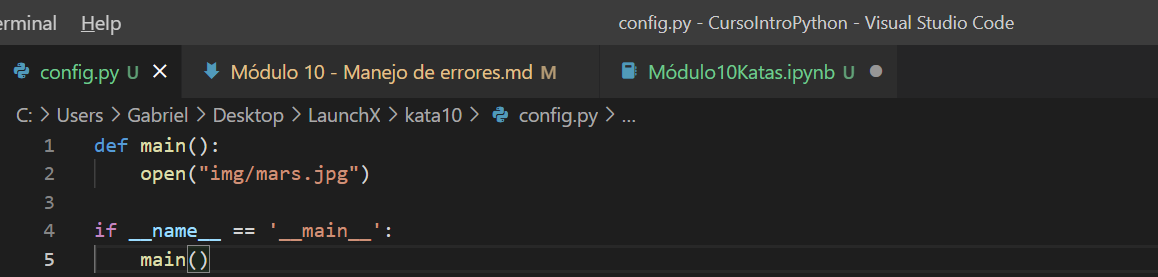

In [2]:
from IPython.display import Image
Image("img/create_open.png", width=800)

Ejecutamos open.py desde el command prompt de windows para ver el siguiente traceback:

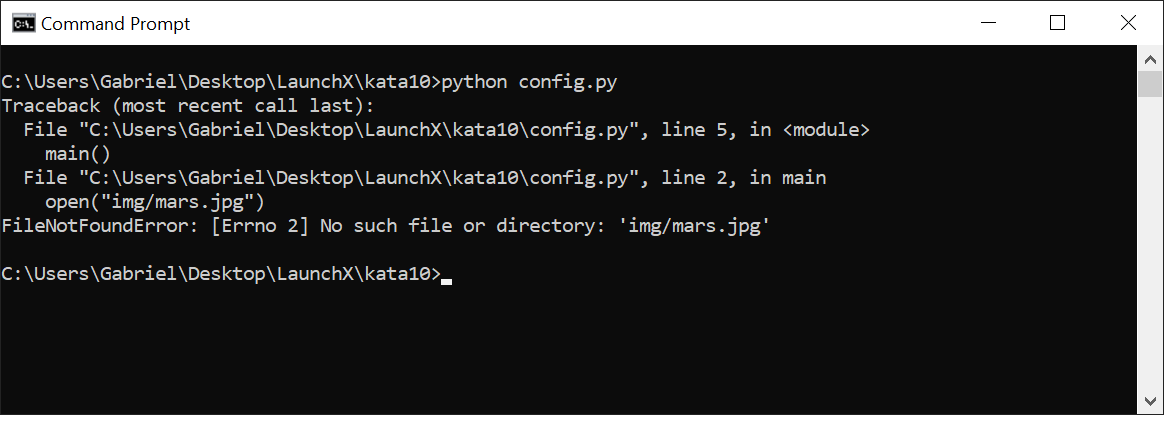

In [3]:
Image("img/error_open.png", width=800)

Usamos try y except para controlar la excepción FileNotFoundError:

In [4]:
try:
    open('img/mars.png')
except FileNotFoundError:
    print("Couldn't find the config.txt file!")

Couldn't find the config.txt file!


A continuación creamos el archivo config.py con la siguiente función: 

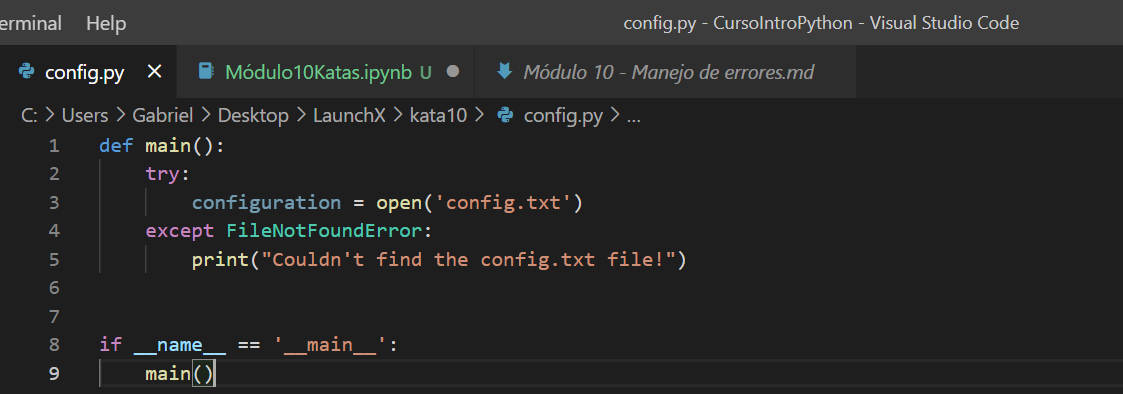

In [5]:
Image("img/create_config.png", width=800)

Después de crear el directorio config.txt y ejecutar el archivo config.py desde el command prompt de Windows obtenemos el siguiente error:

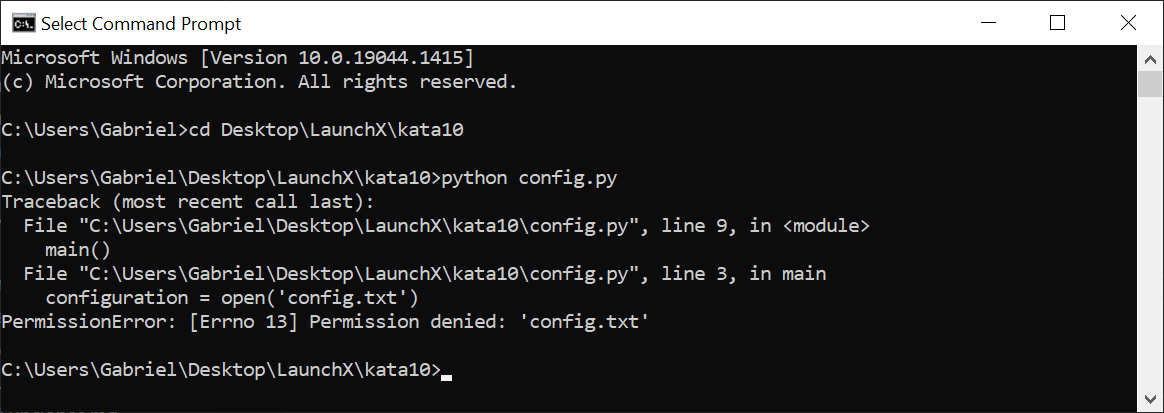

In [6]:
Image("img/error_config.png", width=800)

Modificación de la función main:

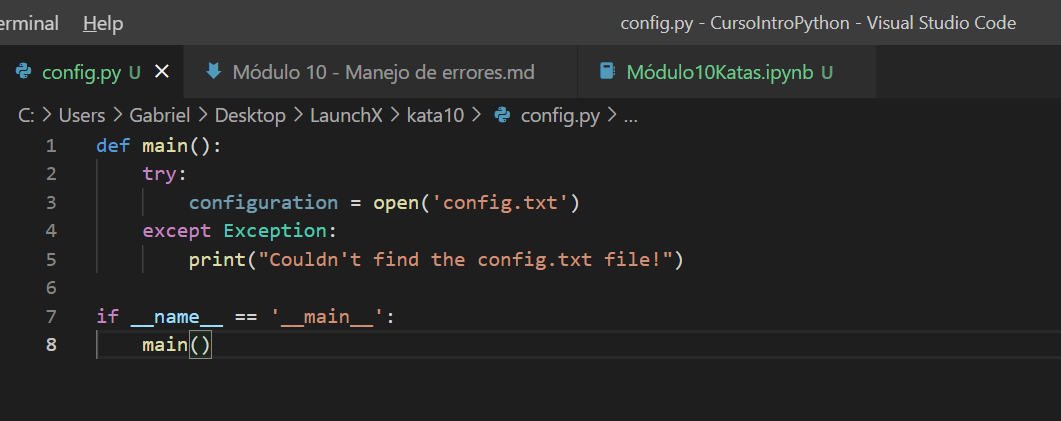

In [7]:
Image("img/modify_main.png", width=800)

Al ejecutar config.py modificado, obtenemos el siguiente mensaje

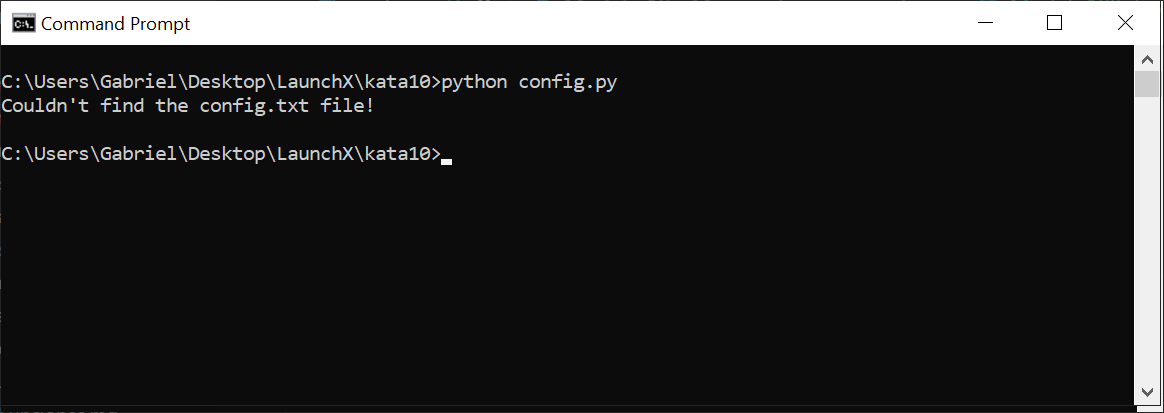

In [8]:
Image("img/error_config_modified.png", width=800)

Actualizando la función main nuevamente para considerar diferentes excepciones:

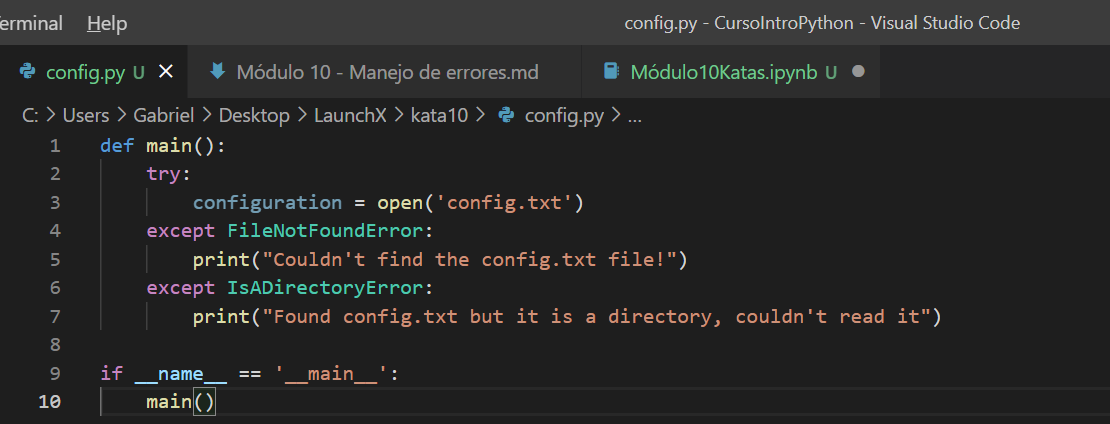

In [9]:
Image("img/different_exceptions.png", width=800)

Ejecutamos la nueva función y obtenemos lo siguiente: 

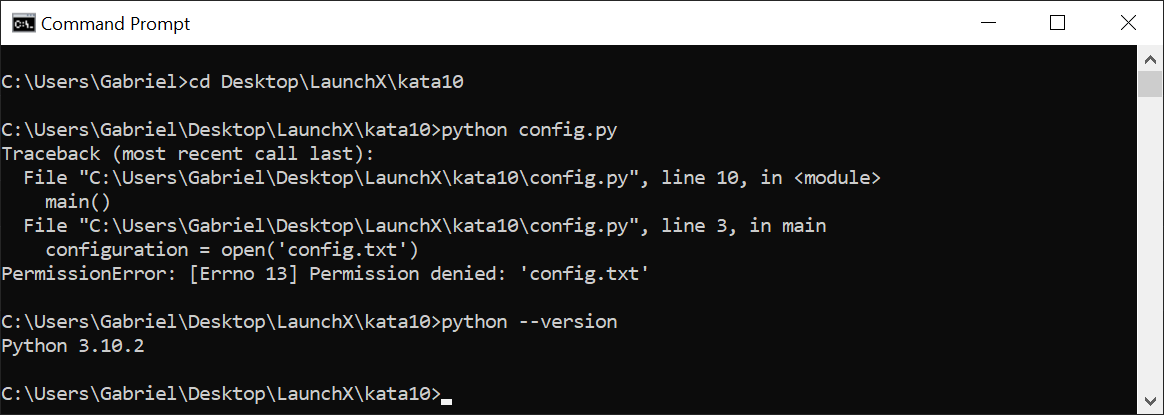

In [10]:
Image("img/error_different_exceptions.png", width=800)

Al eliminar el directorio config.txt y ejecutar config.py nuevamente podemos notar que el programa detecta la primer excepción:

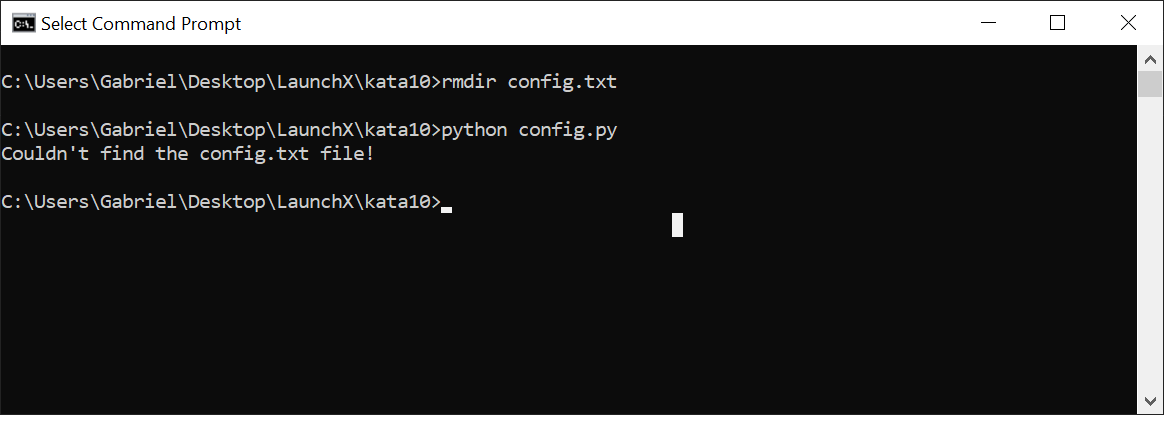

In [11]:
Image("img/error_first_exception.png", width=800)

Algunas excepciones pueden agruparse mediante el uso de parentesis después de la palabra except: 

In [13]:
def main():
    try:
        configuration = open('config.txt')
    except FileNotFoundError:
        print("Couldn't find the config.txt file!")
    except IsADirectoryError:
        print("Found config.txt but it is a directory, couldn't read it")
    except (BlockingIOError, TimeoutError):
        print("Filesystem under heavy load, can't complete reading configuration file")

if __name__ == '__main__':
    main()

Couldn't find the config.txt file!


Es posible almacenar el mensaje de la excepción en una variable usando la palabra as después de la excepción:


In [14]:
try:
    open("img/mars.jpg")
except FileNotFoundError as err:
    print("got a problem trying to read the file:", err)

got a problem trying to read the file: [Errno 2] No such file or directory: 'img/mars.jpg'


# Generación de excepciones

La siguiente función determina el agua restante para un número de astronautas y días dados.

In [15]:
def water_left(astronauts, water_left, days_left):
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    return f"Total water left after {days_left} days is: {total_water_left} liters"

In [16]:
# Prueba la función con 5 astronautas, 100 litros de agua y 2 días
water_left(5, 100, 2)

'Total water left after 2 days is: -10 liters'

El resultado negativo indica que el agua sería insuficiente para todos los astronautas por 2 días, por lo que es necesario alertar esta situación previo a la misión.

In [18]:
# Añadiendo el mensaje de error en la función water left
def water_left(astronauts, water_left, days_left):
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    if total_water_left < 0:
        raise RuntimeError(f"There is not enough water for {astronauts} astronauts after {days_left} days!")
    return f"Total water left after {days_left} days is: {total_water_left} liters"

In [19]:
# Probamos nuevamente la función 
water_left(5, 100, 2)

RuntimeError: There is not enough water for 5 astronauts after 2 days!

De esta forma el sistema puede usar RuntimeError para generar la alerta. 

In [21]:
# Mostrando la alerta del sistema
try:
    water_left(5, 100, 2)
except RuntimeError as err:
    print(err)

There is not enough water for 5 astronauts after 2 days!


Ahora probamos la función water_left con enviando argumentos no válidos

In [24]:
# Probando water_left con argumentos no válidos tipo cadena y none
water_left("3", "200", None)

TypeError: All arguments must be of type int, but received: '3'

Debido a que el error no es descriptivo, actualizamos la función para manejar de mejor forma este tipo de error. 

In [25]:
def water_left(astronauts, water_left, days_left):
    for argument in [astronauts, water_left, days_left]:
        try:
            # If argument is an int, the following operation will work
            argument / 10
        except TypeError:
            # TypError will be raised only if it isn't the right type 
            # Raise the same exception but with a better error message
            raise TypeError(f"All arguments must be of type int, but received: '{argument}'")
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    if total_water_left < 0:
        raise RuntimeError(f"There is not enough water for {astronauts} astronauts after {days_left} days!")
    return f"Total water left after {days_left} days is: {total_water_left} liters"

Finalmente probamos la función con argumentos no validos para ver el nuevo mensaje. 

In [26]:
# Probando water_left con parametros no válidos 
water_left("3", "200", None)

TypeError: All arguments must be of type int, but received: '3'

El nuevo mensaje de error es más descriptivo al indicar que los argumentos deben ser de tipo entero y se recibe una cadena. 